In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../data/housing.csv" # path per il dataset
sns.set_theme(style="whitegrid") # rendere i grafici più belli

print("✅ Importate librerie")

✅ Importate librerie


## Prima esplorazione
1. Che colonne ci sono nel dataset

In [34]:
df = pd.read_csv(DATA_PATH)

print(f"(righe, colonne) del dataset: {df.shape}\n")
print("Prime 5 righe del dataset:")
print(df.head())

(righe, colonne) del dataset: (545, 13)

Prime 5 righe del dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## Controllo dati mancanti

In [36]:

# print(df.info())
# count conta quante righe, sum somma e True è 1, False è 0
dati_mancanti = df.isnull().sum()
# Conto quanti valori sono null per ogni colonna e stampo solo quelle problematiche
print("Stampo le colonne che hanno problemi: \n")
print(dati_mancanti[dati_mancanti > 0])

Stampo le colonne che hanno problemi: 

Series([], dtype: int64)


## Plotto il grafico con seaborn

### Distribuzione delle case in base al prezzo
La colonna che mi interessa analizzare è il prezzo df[`price`]

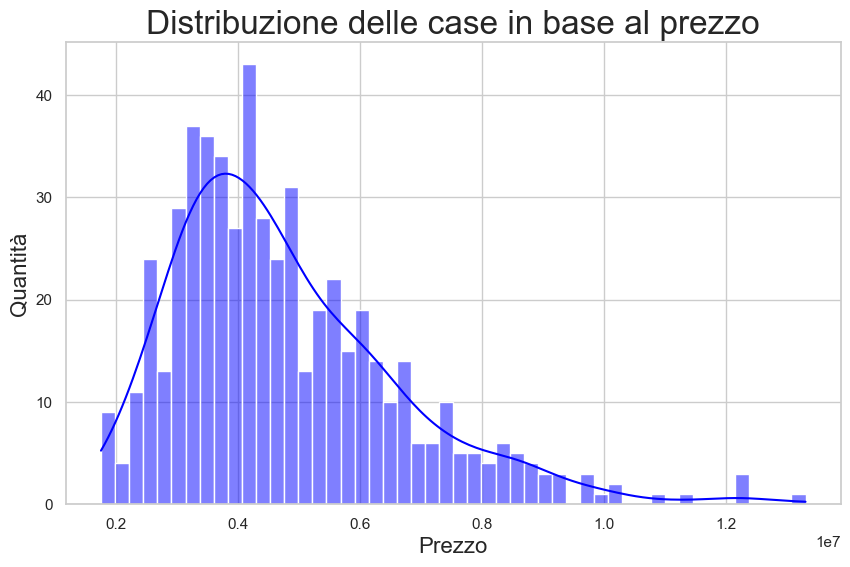

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='price', # che colonna voglio usare: df['price']
    kde=True, # disegna la riga sovrapposta al grafico che ne aiuta la lettura
    bins=50, # numero di rettangoli in cui dividere la distribuzione
    color="blue"
    )
plt.title("Distribuzione delle case in base al prezzo", size=24)
plt.xlabel('Prezzo', size=16)
plt.ylabel('Quantità', size=16)
plt.show()

### Analisi:
Noto che ci sono molte più case economiche e poche ville milionarie (come mi aspetto)